In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r'IndividualDetails.csv')

Cleaning of dataset

In [46]:
#Getting the count of null values in each column
df.isnull().sum()

id                       0
government_id         4215
diagnosed_date           0
age                   4351
gender                3912
detected_city         4480
detected_district      940
detected_state           0
nationality           4256
current_status           1
status_change_date     110
notes                 1218
dtype: int64

In [47]:
#Checking if any row have all missing values
df.isnull().all(axis=1).sum()

0

In [48]:
#Dropping rows having more than 7 null values 
df=df[df.isnull().sum(axis=1)<8]

In [49]:
#Dropping columns which are not used for analysis
df = df.drop('government_id', axis=1)
df = df.drop('status_change_date', axis=1)
df = df.drop('notes', axis=1)

In [50]:
#finding percentage of missing value in each column
round(100*(df.isnull().sum()/len(df.index)), 2) 

id                    0.00
diagnosed_date        0.00
age                  81.23
gender               73.03
detected_city        83.64
detected_district    17.54
detected_state        0.00
nationality          79.46
current_status        0.00
dtype: float64

In [51]:
#As dataset is having larger percentage of null values, therefore we simply cannot remove it as it 
#will lead to larger data loss. Therefore replacing null values with a common tag called "NK"

In [52]:
#Final check for null values in each column
df.isnull().sum(axis=0)
#replace that age with the average value
df=df.replace('28-35','31')

In [73]:
df


,id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status
0,0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered
3,3,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered
4,4,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered
5,5,03/03/2020,69,M,Jaipur,Italians*,Rajasthan,Italy,Recovered
20,20,04/03/2020,70,F,Jaipur,Italians*,Rajasthan,Italy,Recovered
...,...,...,...,...,...,...,...,...,...
4858,4858,07/04/2020,33,M,Mudhol,Bagalkote,Karnataka,India,Hospitalized
4861,4861,07/04/2020,29,M,Bengaluru,Bengaluru,Karnataka,India,Hospitalized
4862,4862,07/04/2020,50,M,Bengaluru,Bengaluru,Karnataka,India,Hospitalized
4864,4864,07/04/2020,68,M,Bengaluru,Bengaluru,Karnataka,India,Hospitalized


comparison of age of patient in every states

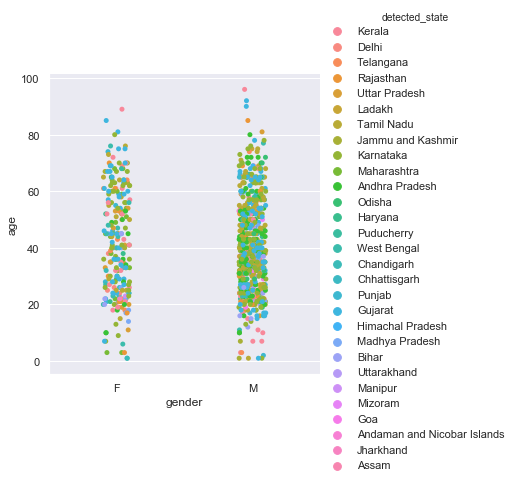

In [53]:
dfplot=df[["age","gender","detected_state"]].dropna()#droping NA values from data set 
indexNames = dfplot[ dfplot['age'] == '28-35' ].index # Get names of indexes for which column Age has value 30 
dfplot.drop(indexNames , inplace=True) # Delete these row indexes from dataFrame 
df.gender 
df['gender'] 
df['gender'].value_counts() 
dfplot['age'] = pd.to_numeric(dfplot['age']) 
sns.catplot(x= 'gender' ,y="age",hue='detected_state',data=dfplot)

In [54]:
#State wise cases
df['detected_state'].value_counts()

Maharashtra                    1018
Tamil Nadu                      690
Delhi                           576
Telangana                       404
Rajasthan                       348
Kerala                          336
Uttar Pradesh                   332
Andhra Pradesh                  314
Madhya Pradesh                  290
Karnataka                       175
Gujarat                         175
Haryana                         143
Jammu and Kashmir               125
Punjab                           99
West Bengal                      91
Odisha                           42
Bihar                            38
Uttarakhand                      31
Assam                            28
Himachal Pradesh                 27
Chandigarh                       18
Ladakh                           14
Chhattisgarh                     10
Andaman and Nicobar Islands      10
Goa                               7
Puducherry                        5
Jharkhand                         4
Manipur                     

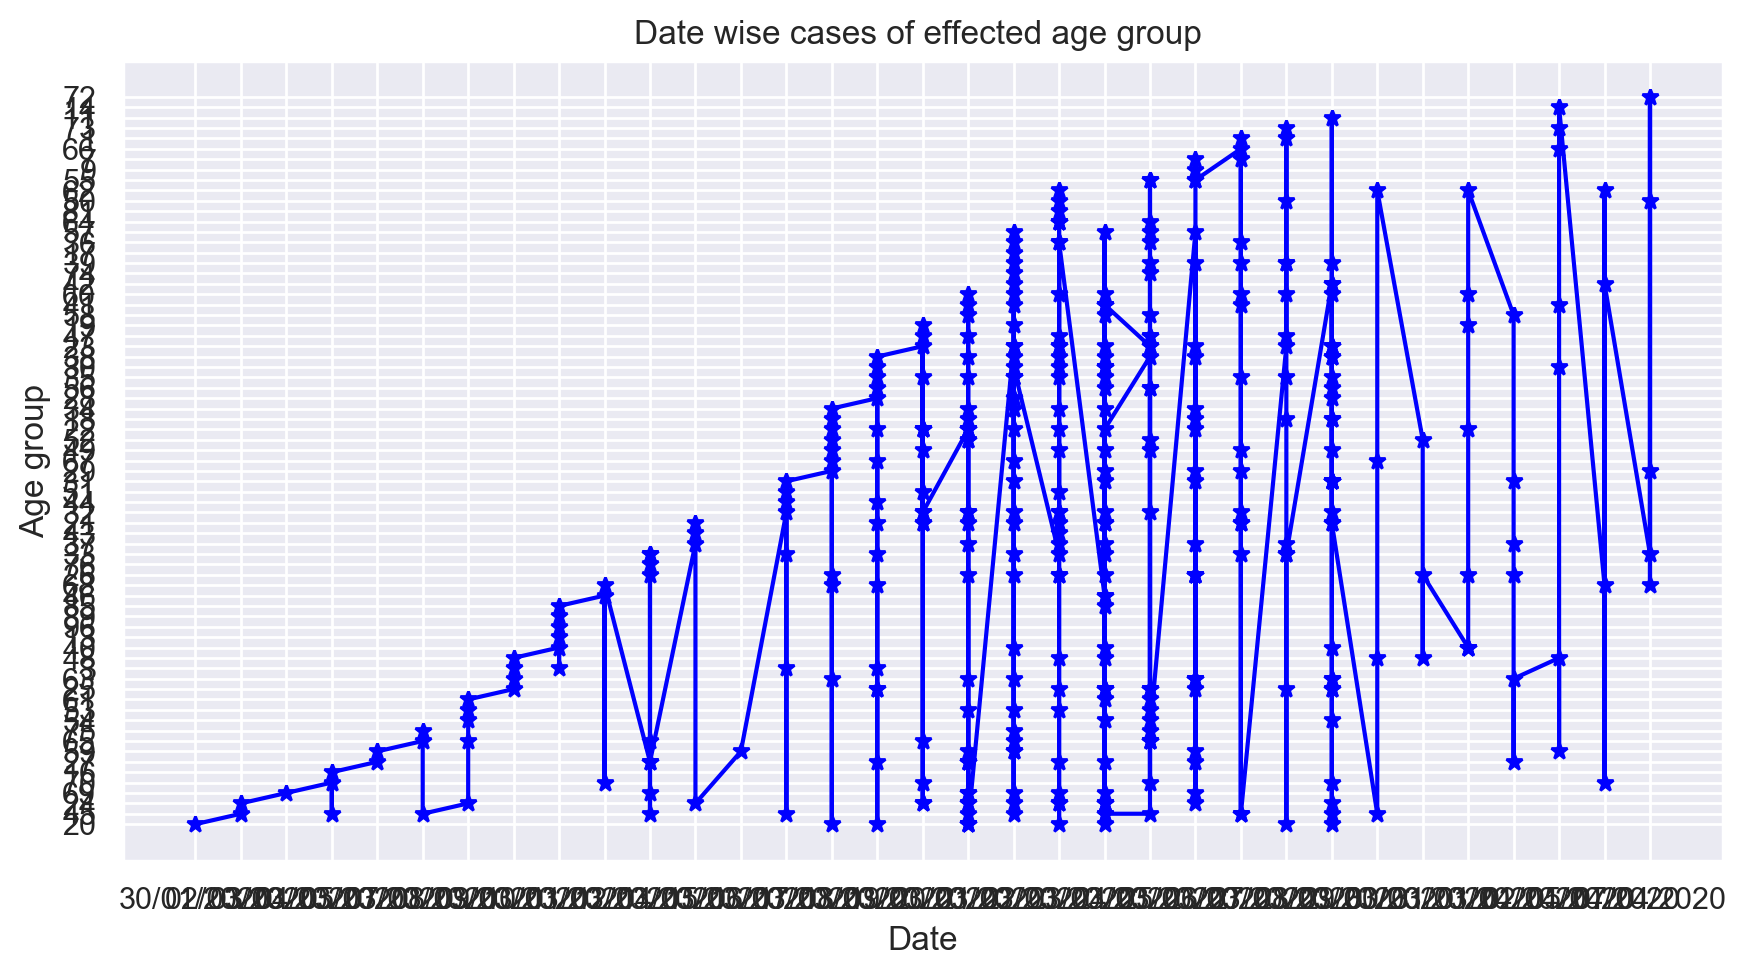

In [58]:
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(df["diagnosed_date"],df["age"],color='blue',marker='*')
axes.set_xlabel("Date")
axes.set_ylabel("Age group")
axes.set_title("Date wise cases of effected age group ")
plt.show()

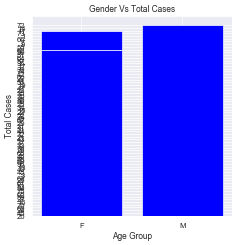

In [72]:
fig=plt.figure(figsize=(5,5),dpi=50)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(df['gender'],df['age'],color='blue')
axes.set_xlabel("Age Group")
axes.set_ylabel("Total Cases")
axes.set_title("Gender Vs Total Cases")
plt.show()